<a href="https://colab.research.google.com/github/ewerton-lemes/Analise_de_dados_da_F1/blob/main/An%C3%A1lise_de_dados_da_Formula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados da Fórmula 1

Os dados usados neste nesse notebook estão disponíveis em https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

## Pacotes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Quais e quantas são as nacionalidades dos pilotos de F1 que correram de 1950 a 2022?

In [3]:
# Carregando o dataset dos pilotos
pilotos = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/drivers.csv')

In [4]:
# Visualizar o dataset pilotos
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
# Formato da tabela
pilotos.shape

(857, 9)

In [6]:
# Verificando se há dados faltantes
pilotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [7]:
#Nacionalidade dos pilotos
nacionalidades_pilotos = pilotos['nationality'].unique()
for i in nacionalidades_pilotos:
  print(i)

British
German
Spanish
Finnish
Japanese
French
Polish
Brazilian
Italian
Australian
Austrian
American
Dutch
Colombian
Portuguese
Canadian
Indian
Hungarian
Irish
Danish
Argentine
Czech
Malaysian
Swiss
Belgian
Monegasque
Swedish
Venezuelan
New Zealander
Chilean
Mexican
South African
Liechtensteiner
Rhodesian
American-Italian
Uruguayan
Argentine-Italian
Thai
East German
Russian
Indonesian
Chinese


In [8]:
# Total de nacionalidades dos pilotos que correram na F1
nacionalidades_pilotos.shape[0]

42

**Conclusão:**

De 1950 a 2022 houveram pilotos de 42 nacionalidades diferentes na F1. São elas: britânico, alemão, espanhol, finlandês, japonês, francês, polonês, brasileiro, italiano, australiano, austríaco, americano, holandês, colombiano, português, canadense, indiano, húngaro, irlandês, dinamarquês, argentino, tcheco, malaio, suíço, belga, monegasco, sueco, venezuelano, neozelandês, chileno, mexicano, sul africano, liechtensteinense, rodesiano, americano-italiano, uruguaio, argentino-italiano, tailandês, alemão oriental, russo, indonésio, chinês.

## Quantos pilotos de cada nacinalidade correram na F1 1950 a 2022?





In [9]:
# Contagem da nacionalidade dos pilotos
contagem_nacionalidade_pilotos = pilotos['nationality'].value_counts()
contagem_nacionalidade_pilotos

British              165
American             158
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              20
Dutch                 18
Australian            18
Austrian              15
Spanish               15
Canadian              14
Swedish               10
Finnish                9
New Zealander          9
Mexican                6
Irish                  5
Danish                 5
Monegasque             4
Russian                4
Uruguayan              4
Portuguese             4
Rhodesian              4
East German            3
Venezuelan             3
Colombian              3
Indian                 2
Thai                   2
Indonesian             1
Argentine-Italian      1
Czech                  1
American-Italian       1
Liechtensteiner        1
Chilean                1
Malaysian              1
Hungarian              1


In [10]:
contagem_nacionalidade_pilotos.values

array([165, 158,  99,  73,  50,  32,  24,  23,  23,  23,  20,  18,  18,
        15,  15,  14,  10,   9,   9,   6,   5,   5,   4,   4,   4,   4,
         4,   3,   3,   3,   2,   2,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1])

In [11]:
# Data frame com as nacionalidades traduzidas
nacionalidades_traduzidas = ['britânico', 'alemão', 'espanhol', 'finlandês', 'japonês', 'francês', 'polonês', 'brasileiro', 'italiano', 'australiano', 'austríaco', 'americano', 'holandês', 'colombiano', 'português', 'canadense', 'indiano', 'húngaro', 'irlandês', 'dinamarquês', 'argentino', 'tcheco', 'malaio', 'suíço', 'belga', 'monegasco', 'sueco', 'venezuelano', 'neozelandês', 'chileno', 'mexicano', 'sul africano', 'liechtensteinense', 'rodesiano', 'americano-italiano', 'uruguaio', 'argentino-italiano', 'tailandês', 'alemão oriental', 'russo', 'indonésio', 'chinês']
colunas = [nacionalidades_traduzidas, contagem_nacionalidade_pilotos.values]

In [12]:
contagem_nacionalidade_pilotos = pd.DataFrame(colunas, index=['nacionalidade', 'quantidade']).T


**Conclusão:**

In [13]:
contagem_nacionalidade_pilotos

,nacionalidade,quantidade
0,britânico,165
1,alemão,158
2,espanhol,99
3,finlandês,73
4,japonês,50
5,francês,32
6,polonês,24
7,brasileiro,23
8,italiano,23
9,australiano,23


## Quais são os continentes de origem dos pilotos de F1 e qual teve a maior quantidade de pilotos?

In [14]:
# continentes dos pilotos
europa = ['britânico', 'francês', 'alemão', 'espanhol', 'finlandês', 'polonês', 'italiano', 'austríaco', 'holandês', 'português', 'húngaro', 'irlandês', 'dinamarquês', 'tcheco', 'suíço', 'belga', 'monegasco', 'sueco', 'liechtensteinense', 'alemão oriental']
asia = ['japonês', 'indiano', 'malaio', 'tailandês', 'russo', 'indonésio', 'chinês']
america_do_sul = ['brasileiro', 'colombiano', 'argentino', 'venezuelano', 'chileno', 'uruguaio', 'argentino-italiano']
america_do_norte = ['americano', 'canadense', 'mexicano', 'americano-italiano']
oceania = ['australiano', 'neozelandês']
africa = ['sul africano', 'rodesiano']

def continente(pais):
  if pais in europa:
    return 'Europa'
  if pais in asia:
    return 'Ásia'
  if pais in america_do_norte:
    return 'América do Norte'
  if pais in america_do_sul:
    return 'América do Sul'
  if pais in oceania:
    return 'Oceania'
  if pais in africa:
    return 'Africa'

continentes = list(map(continente, nacionalidades_traduzidas))

contagem_nacionalidade_pilotos['continente'] = continentes

contagem_nacionalidade_pilotos

,nacionalidade,quantidade,continente
0,britânico,165,Europa
1,alemão,158,Europa
2,espanhol,99,Europa
3,finlandês,73,Europa
4,japonês,50,Ásia
5,francês,32,Europa
6,polonês,24,Europa
7,brasileiro,23,América do Sul
8,italiano,23,Europa
9,australiano,23,Oceania


In [15]:
# contagem por continente dos pilotos
continente_dos_pilotos = contagem_nacionalidade_pilotos.groupby('continente').count()
continente_dos_pilotos.reset_index()

,continente,nacionalidade,quantidade
0,Africa,2,2
1,América do Norte,4,4
2,América do Sul,7,7
3,Europa,20,20
4,Oceania,2,2
5,Ásia,7,7


In [16]:
continente_dos_pilotos = continente_dos_pilotos.drop('nacionalidade', axis=1).reset_index()

In [17]:
continente_dos_pilotos.sort_values(by='quantidade', ascending=False, inplace=True)

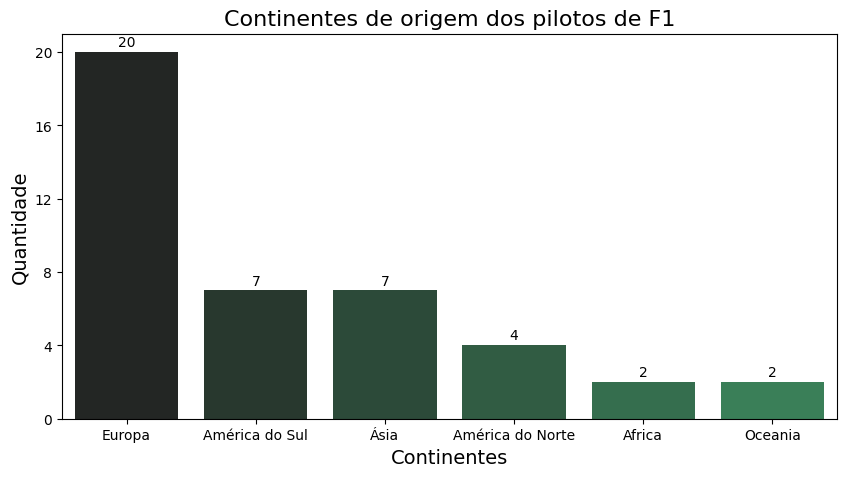

In [18]:
# paleta de cores
paleta = sns.dark_palette("seagreen")
sns.set_palette(paleta)

# Gráfico para visualização dos continentes dos pilotos
plt.figure(figsize=(10,5))
fig1 = sns.barplot(data=continente_dos_pilotos, x='continente', y='quantidade')

for i in fig1.patches:
  fig1.annotate(text = int(i.get_height()), xy = (i.get_x() + .4, i.get_height() + .3), ha='center')

plt.title('Continentes de origem dos pilotos de F1', fontsize=16)
fig1.set_yticks(range(0, 23, 4))
plt.xlabel('Continentes', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

plt.show()

**Conclusão:**

Os continentes de origem dos pilotos de são: if pais in europa: Europa, Ásia, América do Norte, América do Sul, Oceania e África. Entre 1950 e 2022, a maioria dos pilotos que correram na F1 foram europeus.

## Quantos são e quais os nomes dos pilotos brasileiros que correram na F1 de 1950 e 2022?

In [19]:
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [20]:
pilotos.nationality.unique()

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Argentine', 'Czech',
       'Malaysian', 'Swiss', 'Belgian', 'Monegasque', 'Swedish',
       'Venezuelan', 'New Zealander', 'Chilean', 'Mexican',
       'South African', 'Liechtensteiner', 'Rhodesian',
       'American-Italian', 'Uruguayan', 'Argentine-Italian', 'Thai',
       'East German', 'Russian', 'Indonesian', 'Chinese'], dtype=object)

In [21]:
# pilotos brasileiros
pilotos_brasileiros = pilotos.query("nationality == 'Brazilian'")[['forename', 'surname']]
pilotos_brasileiros

,forename,surname
11,Nelson,Piquet Jr.
12,Felipe,Massa
21,Rubens,Barrichello
40,Ricardo,Zonta
41,Antônio,Pizzonia
42,Cristiano,da Matta
53,Luciano,Burti
57,Tarso,Marques
58,Enrique,Bernoldi
63,Pedro,Diniz


In [22]:
# nomes dos pilotos brasileiros
pilotos_brasileiros_nomes = []
for i in range(0, len(pilotos_brasileiros)):
  pilotos_brasileiros_nomes.append(pilotos_brasileiros['forename'].values[i] + ' ' + pilotos_brasileiros['surname'].values[i])
pilotos_brasileiros_nomes

['Nelson Piquet Jr.',
 'Felipe Massa',
 'Rubens Barrichello',
 'Ricardo Zonta',
 'Antônio Pizzonia',
 'Cristiano da Matta',
 'Luciano Burti',
 'Tarso Marques',
 'Enrique Bernoldi',
 'Pedro Diniz',
 'Ricardo Rosset',
 'Roberto Moreno',
 'Ayrton Senna',
 'Christian Fittipaldi',
 'Maurício Gugelmin',
 'Nelson Piquet',
 'Chico Serra',
 'Raul Boesel',
 'Emerson Fittipaldi',
 'Alex Ribeiro',
 'Carlos Pace',
 'Ingo Hoffmann',
 'Wilson Fittipaldi',
 'Luiz Bueno',
 "Fritz d'Orey",
 'Chico Landi',
 'Hernando da Silva Ramos',
 'Gino Bianco',
 'Lucas di Grassi',
 'Bruno Senna',
 'Felipe Nasr',
 'Pietro Fittipaldi']

**Conclusão:**

Entre 1950 e 2022, 32 pilotos brasiliros correram na F1. Esses são os seus nomes: Nelson Piquet Jr., Felipe Massa, Rubens Barrichello, Ricardo Zonta, Antônio Pizzonia, Cristiano da Matta, Luciano Burti, Tarso Marques, Enrique Bernoldi, Pedro Diniz, Ricardo Rosset, Roberto Moreno, Ayrton Senna, Christian Fittipaldi, Maurício Gugelmin, Nelson Piquet, Chico Serra, Raul Boesel, Emerson Fittipaldi, Alex Ribeiro, Carlos Pace, Ingo Hoffmann, Wilson Fittipaldi, Luiz Bueno, Fritz d'Orey, Chico Landi, Hernando da Silva Ramos, Gino Bianco, Lucas di Grassi, Bruno Senna, Felipe Nasr, Pietro Fittipaldi

## Quantos grandes prêmios cada brasileiro disputou?

In [149]:
resultados = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/results.csv')

In [150]:
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [151]:
# Verificando dados faltantes
resultados.shape

(25840, 18)

In [152]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [153]:
pilotos_id = pilotos.query("nationality == 'Brazilian'")['driverId']
pilotos_id.head()

11    12
12    13
21    22
40    41
41    42
Name: driverId, dtype: int64

In [155]:
# Identificando os pilotos brasileiros no DataFrame pilotos
brasileiro = []
for i in resultados.driverId.values:
  if i in pilotos_id.values:
    brasileiro.append(True)
  else:
    brasileiro.append(False)

In [156]:
resultados['brasileiro'] = brasileiro

In [161]:
numero_de_corridas = resultados.query('brasileiro == True').groupby('driverId')[['driverId']].count()
numero_de_corridas.columns = ['numero_de_corridas']
numero_de_corridas.head()

,numero_de_corridas
driverId,
12,28
13,271
22,326
41,38
42,20


In [162]:
numero_de_corridas_por_piloto = pilotos.query("nationality == 'Brazilian'")[['driverId', 'forename', 'surname']]
numero_de_corridas_por_piloto.set_index('driverId', inplace=True)
numero_de_corridas_por_piloto.head()

,forename,surname
driverId,,
12,Nelson,Piquet Jr.
13,Felipe,Massa
22,Rubens,Barrichello
41,Ricardo,Zonta
42,Antônio,Pizzonia


In [163]:
 numero_de_corridas_por_piloto = numero_de_corridas_por_piloto.join(numero_de_corridas)
 numero_de_corridas_por_piloto.head()

,forename,surname,numero_de_corridas
driverId,,,
12,Nelson,Piquet Jr.,28
13,Felipe,Massa,271
22,Rubens,Barrichello,326
41,Ricardo,Zonta,38
42,Antônio,Pizzonia,20


In [164]:
numero_de_corridas_por_piloto['nome'] = numero_de_corridas_por_piloto['forename'].str.cat(numero_de_corridas_por_piloto['surname'], sep =" ")
numero_de_corridas_por_piloto.drop(['forename', 'surname'], axis=1, inplace=True)
numero_de_corridas_por_piloto.head()

,numero_de_corridas,nome
driverId,,
12,28,Nelson Piquet Jr.
13,271,Felipe Massa
22,326,Rubens Barrichello
41,38,Ricardo Zonta
42,20,Antônio Pizzonia


In [165]:
numero_de_corridas_por_piloto = pd.DataFrame([numero_de_corridas_por_piloto.nome.values, numero_de_corridas_por_piloto.numero_de_corridas.values])

In [166]:
numero_de_corridas_por_piloto = numero_de_corridas_por_piloto.T
numero_de_corridas_por_piloto.columns = ['nome', 'numero_de_corridas']
numero_de_corridas_por_piloto.head()

,nome,numero_de_corridas
0,Nelson Piquet Jr.,28
1,Felipe Massa,271
2,Rubens Barrichello,326
3,Ricardo Zonta,38
4,Antônio Pizzonia,20


In [167]:
numero_de_corridas_por_piloto.sort_values(by='numero_de_corridas', ascending=False, inplace=True)
numero_de_corridas_por_piloto.head()

,nome,numero_de_corridas
2,Rubens Barrichello,326
1,Felipe Massa,271
15,Nelson Piquet,207
12,Ayrton Senna,162
18,Emerson Fittipaldi,149


**Conclusão**

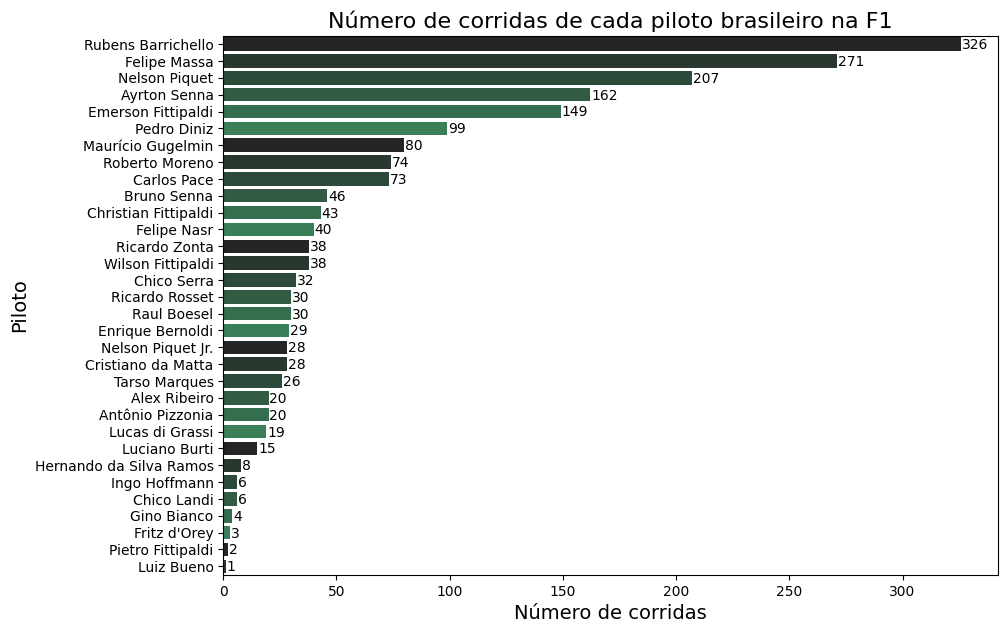

In [172]:
paleta = sns.dark_palette("seagreen")
sns.set_palette(paleta)

# Gráfico para visualização do número de corridas dos pilotos brasileiros
plt.figure(figsize=(10,7))
fig2 = sns.barplot(data=numero_de_corridas_por_piloto, x='numero_de_corridas', y='nome', orient='h', palette=paleta)

for i in fig2.patches:
  fig2.annotate(text = int(i.get_width()), xy = (i.get_width() + .4, i.get_y() + .45), va='center')

plt.title('Número de corridas de cada piloto brasileiro na F1', fontsize=16)
plt.xlabel('Número de corridas', fontsize=14)
plt.ylabel('Piloto', fontsize=14)

plt.show()